In [1]:
# Input data files are available in the read-only "../input/" directory
# Lists all files under the input directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/auto-insurance-claims-data/insurance_claims.csv
/kaggle/input/insurance-claims/claims2.csv


A. Business Problem:
1. Find the total claims amount
2. Identify if the record is fraud/not fraud


B. Data:
How much data do we have?
Is the data structured?-If NO:-need to perform text analysis, semantic analysis, NLP tasks to extract info from data and create columns and create meaningful columns
                       If YES:-jump to EDA
                       
EDA:
size of the data- len, describe, info
Spread and distribution of data - check for normal distribution, individual variable graphs, std deviations, outliers(if planning for linear models)
Null analysis and imputation- mean(normally distrubuted data), median(skewed data), mode(skewed data)
Dimensionality reduction- 
    Dropping-Dropping unneccesary columns, dopping columns with not enough fill rate)
    Feature Selection-(Filter methods-ANova, Chi Square, T-test, Correlation testing
                       Wrapper methods-Forward(addition of one column after another), backward(substraction- select all and keep on removing)
                       PCA)

Data Transformation-(Categorical- One hot encoding([0,1,0]),
                     Numerical- Normalization/Standardization using (ZScore), PCA,Linear Splines,
                     Text- Text Analaysis on text fields )

Feature Extraction- Average, max, min, sum, ratio, bucketing 
Sampling the data-SRS,Systematic sampling(nth record),Startified Sampling, etc
Training Testing Subsets

Hypothesis Testing

ML algorithm Goal:
Improving a computer program's performance (P)   at some task (T)    via experience (E)
                                    metrics.     clasftn, resgresn   supervised

#### Importing the libararies

In [15]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn  #ML algos

import matplotlib.pyplot as plt # visualization
import seaborn as sns # Formatting

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

pd.set_option('display.max_columns',None)

#### Data Import

In [141]:
data= pd.read_csv('../input/auto-insurance-claims-data/insurance_claims.csv')

In [142]:
print(" Number of records:",len(data))
data.info()
data.head(10)

 Number of records: 1000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
5,256,39,104594,2006-10-12,OH,250/500,1000,1351.10,0,478456,FEMALE,PhD,tech-support,bungie-jumping,unmarried,0,0,2015-01-02,Multi-vehicle Collision,Rear Collision,Major Damage,Fire,SC,Arlington,8973 Washington St,19,3,NO,0,2,NO,64100,6410,6410,51280,Saab,95,2003,Y,NaN
6,137,34,413978,2000-06-04,IN,250/500,1000,1333.35,0,441716,MALE,PhD,prof-specialty,board-games,husband,0,-77000,2015-01-13,Multi-vehicle Collision,Front Collision,Minor Damage,Police,NY,Springfield,5846 Weaver Drive,0,3,?,0,0,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N,NaN
7,165,37,429027,1990-02-03,IL,100/300,1000,1137.03,0,603195,MALE,Associate,tech-support,base-jumping,unmarried,0,0,2015-02-27,Multi-vehicle Collision,Front Collision,Total Loss,Police,VA,Columbus,3525 3rd Hwy,23,3,?,2,2,YES,51590,9380,9380,32830,Audi,A5,2015,N,NaN
8,27,33,485665,1997-02-05,IL,100/300,500,1442.99,0,601734,FEMALE,PhD,other-service,golf,own-child,0,0,2015-01-30,Single Vehicle Collision,Front Collision,Total Loss,Police,WV,Arlington,4872 Rock Ridge,21,1,NO,1,1,YES,27700,2770,2770,22160,Toyota,Camry,2012,N,NaN
9,212,42,636550,2011-07-25,IL,100/300,500,1315.68,0,600983,MALE,PhD,priv-house-serv,camping,wife,0,-39300,2015-01-05,Single Vehicle Collision,Rear Collision,Total Loss,Other,NC,Hillsdale,3066 Francis Ave,14,1,NO,2,1,?,42300,4700,4700,32900,Saab,92x,1996,N,NaN


#### Null Value and Missing Value Analysis

In [143]:
# we can see some missing values denoted by '?' so lets replace missing values with np.nan
data.replace('?', np.nan, inplace = True)
data.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [144]:
#Summary Stats of the data
data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


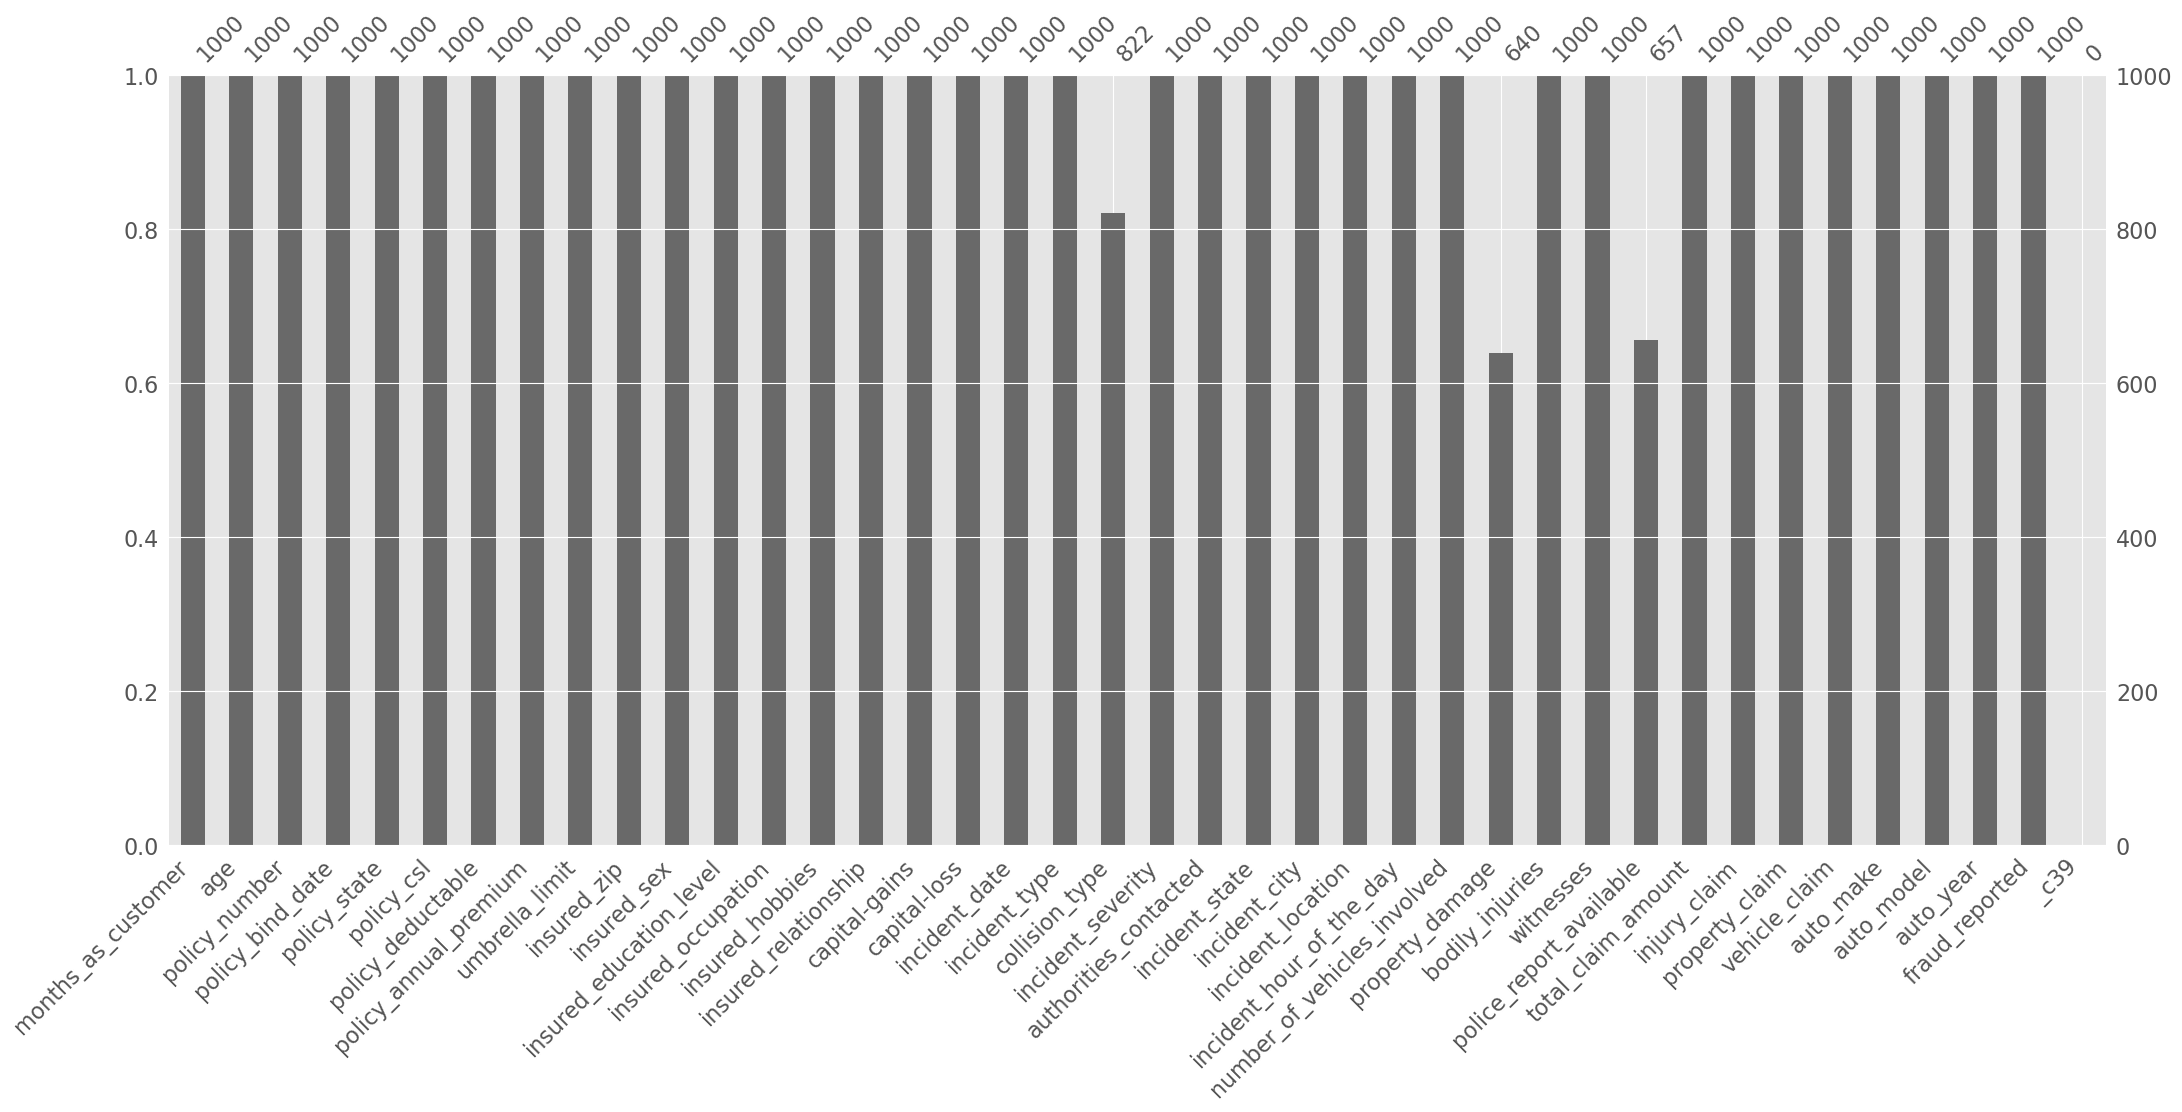

In [145]:
#Visalizing missing value
import missingno as msno

msno.bar(data)
plt.show()

In [146]:
na_cols=[col for col in data.columns if data[col].isna().any()]
na_cols

['collision_type', 'property_damage', 'police_report_available', '_c39']

In [147]:
#Fetch the unique values of respective columns
for col in na_cols:
    print(col, data[col].unique())

collision_type ['Side Collision' nan 'Rear Collision' 'Front Collision']
property_damage ['YES' nan 'NO']
police_report_available ['YES' nan 'NO']
_c39 [nan]


In [148]:
#If you want to exclude the nas, remove the dropna condition
for col in na_cols:
    print("COLUMN:",col,"\n",data[col].value_counts(dropna=False))

COLUMN: collision_type 
 Rear Collision     292
Side Collision     276
Front Collision    254
NaN                178
Name: collision_type, dtype: int64
COLUMN: property_damage 
 NaN    360
NO     338
YES    302
Name: property_damage, dtype: int64
COLUMN: police_report_available 
 NaN    343
NO     343
YES    314
Name: police_report_available, dtype: int64
COLUMN: _c39 
 NaN    1000
Name: _c39, dtype: int64


In [149]:
#Null Value handling 
#data=data.drop('_c39')
for col in na_cols:
    data[col]=data[col].fillna("data[col].mode()[0]")

In [150]:
#Cross check
for col in na_cols:
    print("COLUMN:",col,"\n",data[col].value_counts(dropna=False))

COLUMN: collision_type 
 Rear Collision         292
Side Collision         276
Front Collision        254
data[col].mode()[0]    178
Name: collision_type, dtype: int64
COLUMN: property_damage 
 data[col].mode()[0]    360
NO                     338
YES                    302
Name: property_damage, dtype: int64
COLUMN: police_report_available 
 data[col].mode()[0]    343
NO                     343
YES                    314
Name: police_report_available, dtype: int64
COLUMN: _c39 
 data[col].mode()[0]    1000
Name: _c39, dtype: int64


In [151]:
data.head(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,data[col].mode()[0]
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,data[col].mode()[0],Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,data[col].mode()[0],0,0,data[col].mode()[0],5070,780,780,3510,Mercedes,E400,2007,Y,data[col].mode()[0]
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,data[col].mode()[0]
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,data[col].mode()[0],1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,data[col].mode()[0]
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,data[col].mode()[0],Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,data[col].mode()[0]
5,256,39,104594,2006-10-12,OH,250/500,1000,1351.10,0,478456,FEMALE,PhD,tech-support,bungie-jumping,unmarried,0,0,2015-01-02,Multi-vehicle Collision,Rear Collision,Major Damage,Fire,SC,Arlington,8973 Washington St,19,3,NO,0,2,NO,64100,6410,6410,51280,Saab,95,2003,Y,data[col].mode()[0]
6,137,34,413978,2000-06-04,IN,250/500,1000,1333.35,0,441716,MALE,PhD,prof-specialty,board-games,husband,0,-77000,2015-01-13,Multi-vehicle Collision,Front Collision,Minor Damage,Police,NY,Springfield,5846 Weaver Drive,0,3,data[col].mode()[0],0,0,data[col].mode()[0],78650,21450,7150,50050,Nissan,Pathfinder,2012,N,data[col].mode()[0]
7,165,37,429027,1990-02-03,IL,100/300,1000,1137.03,0,603195,MALE,Associate,tech-support,base-jumping,unmarried,0,0,2015-02-27,Multi-vehicle Collision,Front Collision,Total Loss,Police,VA,Columbus,3525 3rd Hwy,23,3,data[col].mode()[0],2,2,YES,51590,9380,9380,32830,Audi,A5,2015,N,data[col].mode()[0]
8,27,33,485665,1997-02-05,IL,100/300,500,1442.99,0,601734,FEMALE,PhD,other-service,golf,own-child,0,0,2015-01-30,Single Vehicle Collision,Front Collision,Total Loss,Police,WV,Arlington,4872 Rock Ridge,21,1,NO,1,1,YES,27700,2770,2770,22160,Toyota,Camry,2012,N,data[col].mode()[0]
9,212,42,636550,2011-07-25,IL,100/300,500,1315.68,0,600983,MALE,PhD,priv-house-serv,camping,wife,0,-39300,2015-01-05,Single Vehicle Collision,Rear Collision,Total Loss,Other,NC,Hillsdale,3066 Francis Ave,14,1,NO,2,1,data[col].mode()[0],42300,4700,4700,32900,Saab,92x,1996,N,data[col].mode()[0]


In [152]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

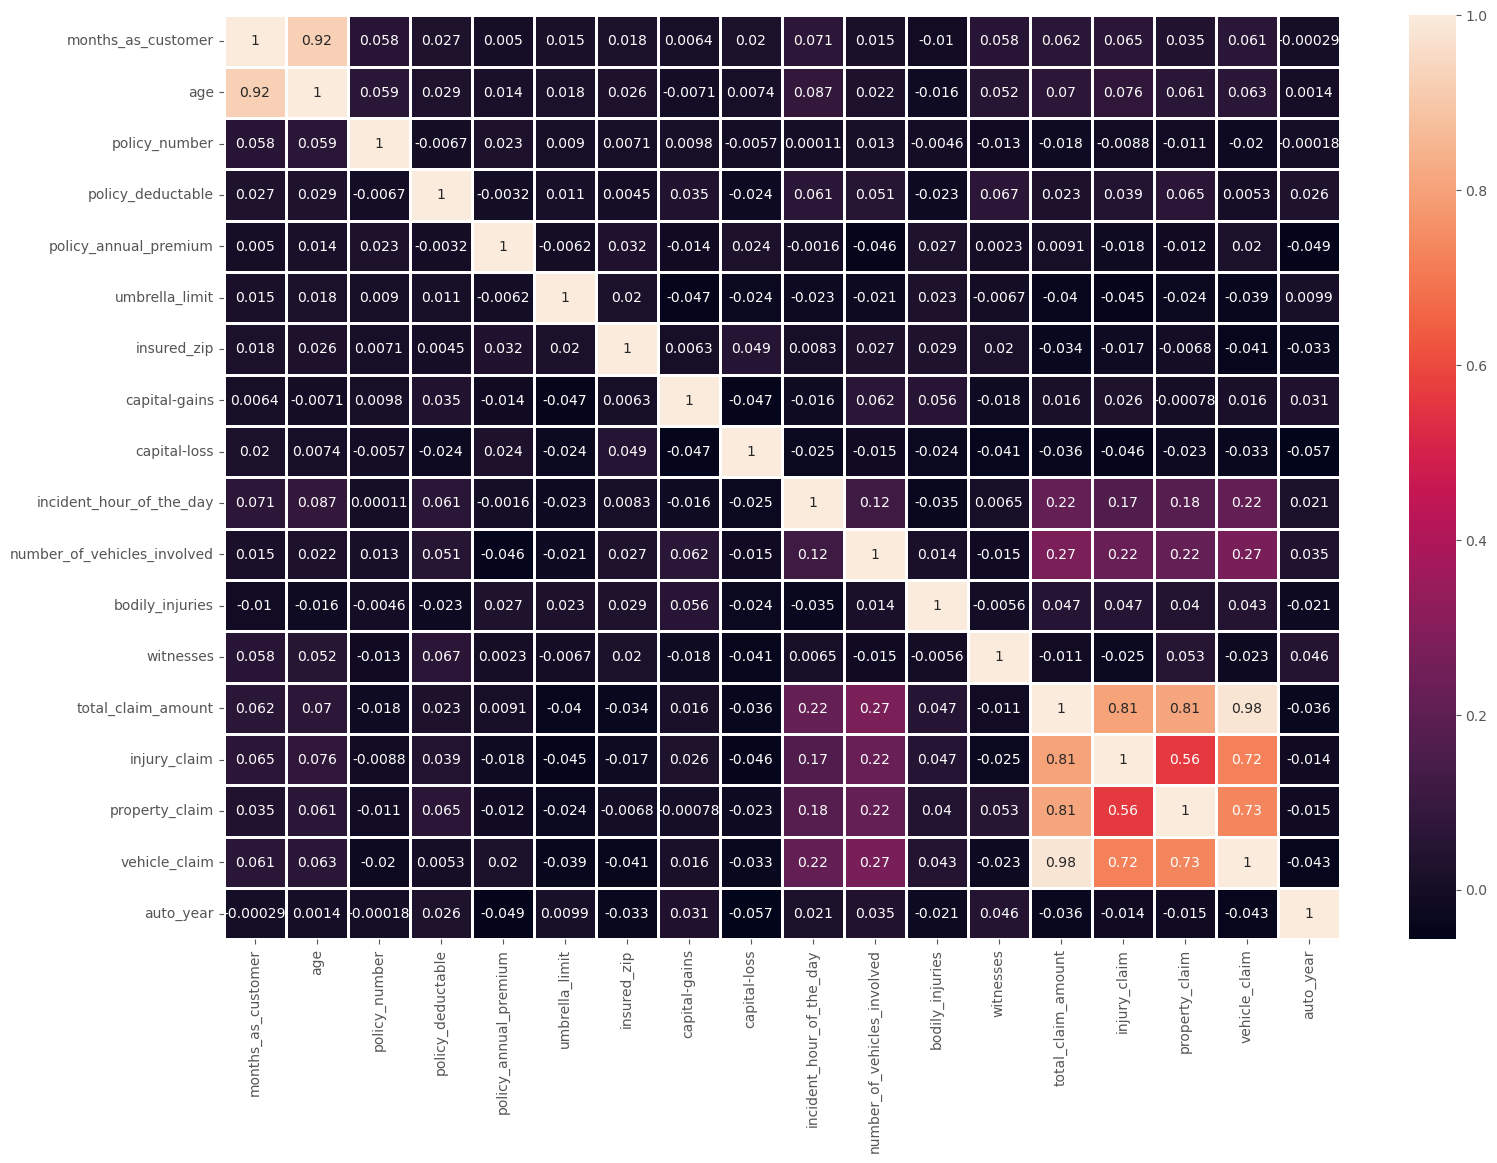

In [153]:
#Dimesnionality Reduction

#Corelation testing- heatmap
plt.figure(figsize = (18, 12))
corr = data.corr()
sns.heatmap(data = corr, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

In [154]:
#DRopping unnecessary columns and highly corelated columns
drop_cols=['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date',
           'incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year', '_c39']
data.drop(columns=drop_cols,inplace=True,axis=1)

In [155]:
data.columns

Index(['months_as_customer', 'age', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'fraud_reported'],
      dtype='object')

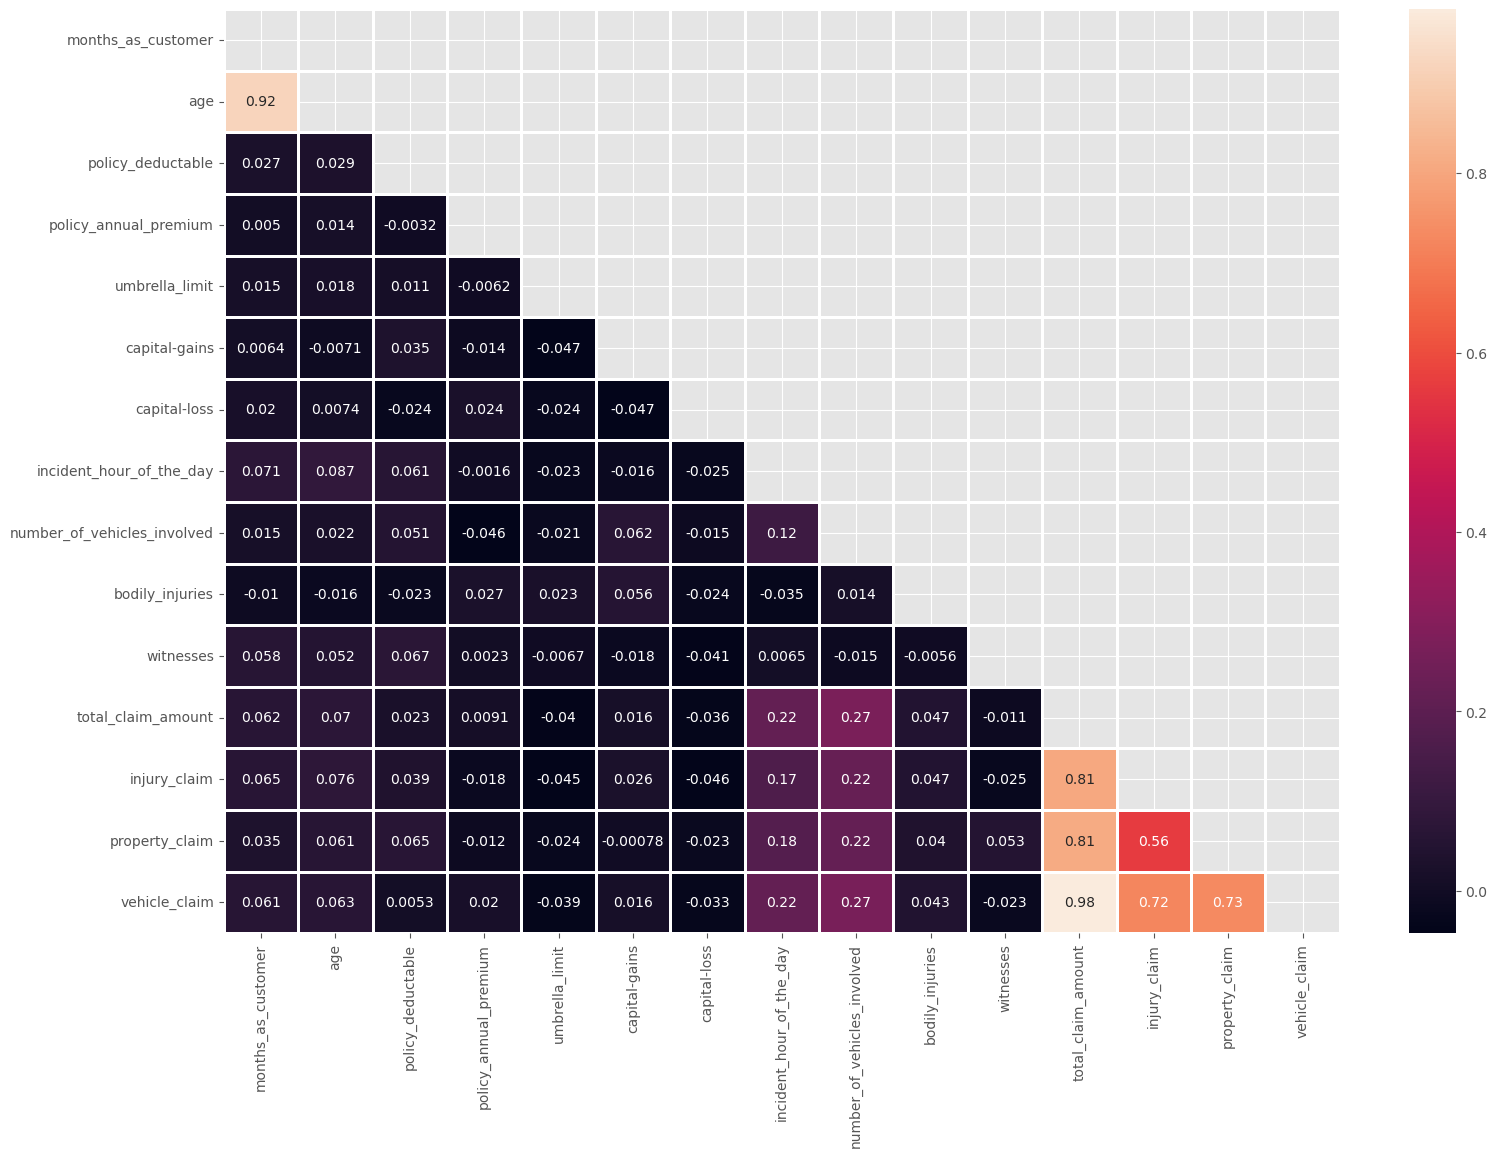

In [156]:
plt.figure(figsize = (18, 12))
corr = data.corr()

mask = np.triu(np.ones_like(corr, dtype = bool)) # masks the redundant info

sns.heatmap(data = corr,mask=mask, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

### DATA TRANSFORMATION

In [157]:
#Separating the features and target

X= data.drop('fraud_reported', axis=1)
y=data['fraud_reported']

#### A.TRANSFORMING CATEGORICAL COLUMNS USING DUMMY VARIABLES

In [158]:
categorical_data = data.select_dtypes(include = ['object'])

In [159]:
categorical_data.columns

Index(['policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_relationship', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'property_damage', 'police_report_available', 'fraud_reported'],
      dtype='object')

In [160]:
# printing unique values of each column
for col in categorical_data.columns:
    print(f"{col}: \n{categorical_data[col].unique()}\n")

policy_csl: 
['250/500' '100/300' '500/1000']

insured_sex: 
['MALE' 'FEMALE']

insured_education_level: 
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']

insured_occupation: 
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']

insured_relationship: 
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']

incident_type: 
['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']

collision_type: 
['Side Collision' 'data[col].mode()[0]' 'Rear Collision' 'Front Collision']

incident_severity: 
['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']

authorities_contacted: 
['Police' 'None' 'Fire' 'Other' 'Ambulance']

property_damage: 
['YES' 'data[col].mode()[0]' 'NO']

police_report_available: 
['YES' 'data[col].mode()[0]' 'NO']

fraud

#### DATA TRANSFORMATION

In [161]:
#Convert Categorical variables to dummy variables
categorical_data = pd.get_dummies(categorical_data, drop_first = True)

In [162]:
categorical_data

,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,collision_type_data[col].mode()[0],incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,property_damage_data[col].mode()[0],police_report_available_YES,police_report_available_data[col].mode()[0],fraud_reported_Y
0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,1
1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,1,0,1,1
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0
996,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0
997,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,1,0,0
998,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0


#### B. NUMERICAL

In [163]:
numerical_data = data.select_dtypes(include=[float, int])
numerical_data.columns

Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'capital-gains',
       'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim',
       'vehicle_claim'],
      dtype='object')

In [164]:
X=pd.concat([numerical_data,categorical_data], axis=1)

In [165]:
X.head(10)

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,collision_type_data[col].mode()[0],incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,property_damage_data[col].mode()[0],police_report_available_YES,police_report_available_data[col].mode()[0],fraud_reported_Y
0,328,48,1000,1406.91,0,53300,0,5,1,1,2,71610,6510,13020,52080,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,1
1,228,42,2000,1197.22,5000000,0,0,8,1,0,0,5070,780,780,3510,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,1,0,1,1
2,134,29,2000,1413.14,5000000,35100,0,7,3,2,3,34650,7700,3850,23100,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,256,41,2000,1415.74,6000000,48900,-62400,5,1,1,2,63400,6340,6340,50720,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
4,228,44,1000,1583.91,6000000,66000,-46000,20,1,0,1,6500,1300,650,4550,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0
5,256,39,1000,1351.10,0,0,0,19,3,0,2,64100,6410,6410,51280,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
6,137,34,1000,1333.35,0,0,-77000,0,3,0,0,78650,21450,7150,50050,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0
7,165,37,1000,1137.03,0,0,0,23,3,2,2,51590,9380,9380,32830,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0
8,27,33,500,1442.99,0,0,0,21,1,1,1,27700,2770,2770,22160,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
9,212,42,500,1315.68,0,0,-39300,14,1,2,1,42300,4700,4700,32900,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0


### DATA DISTRIBUTION

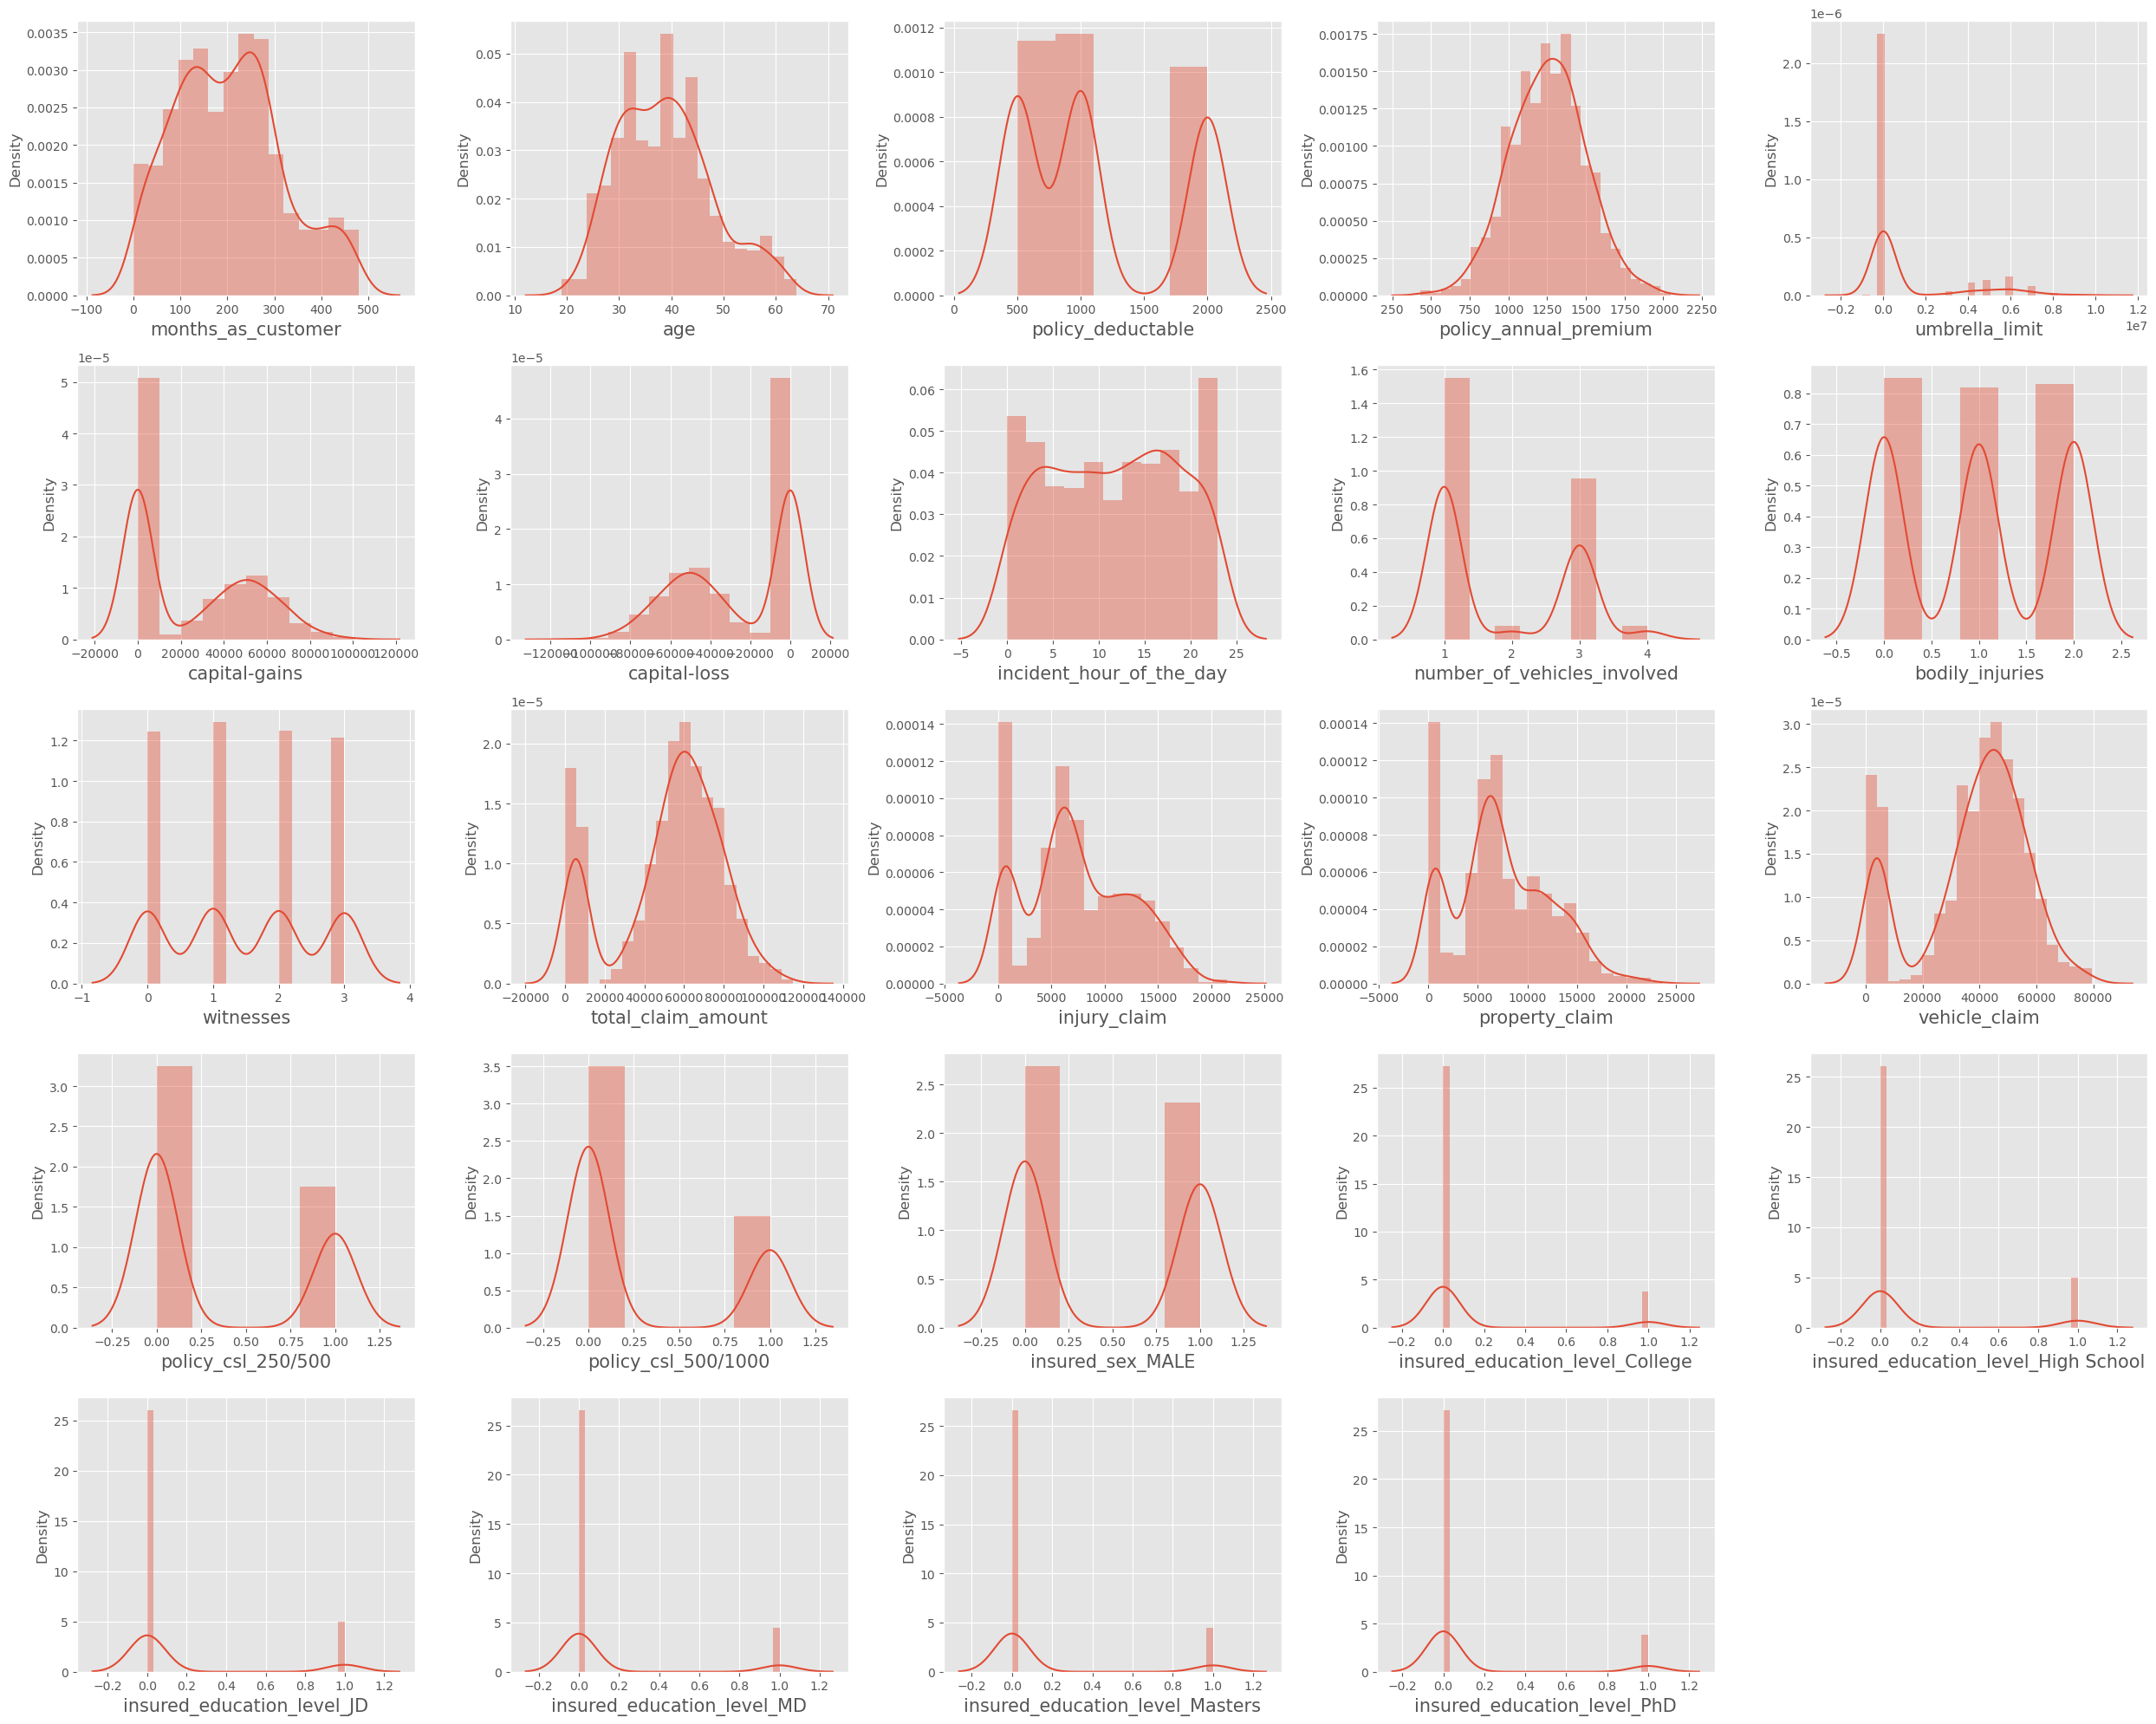

In [166]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.distplot(X[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

Outlier Detection

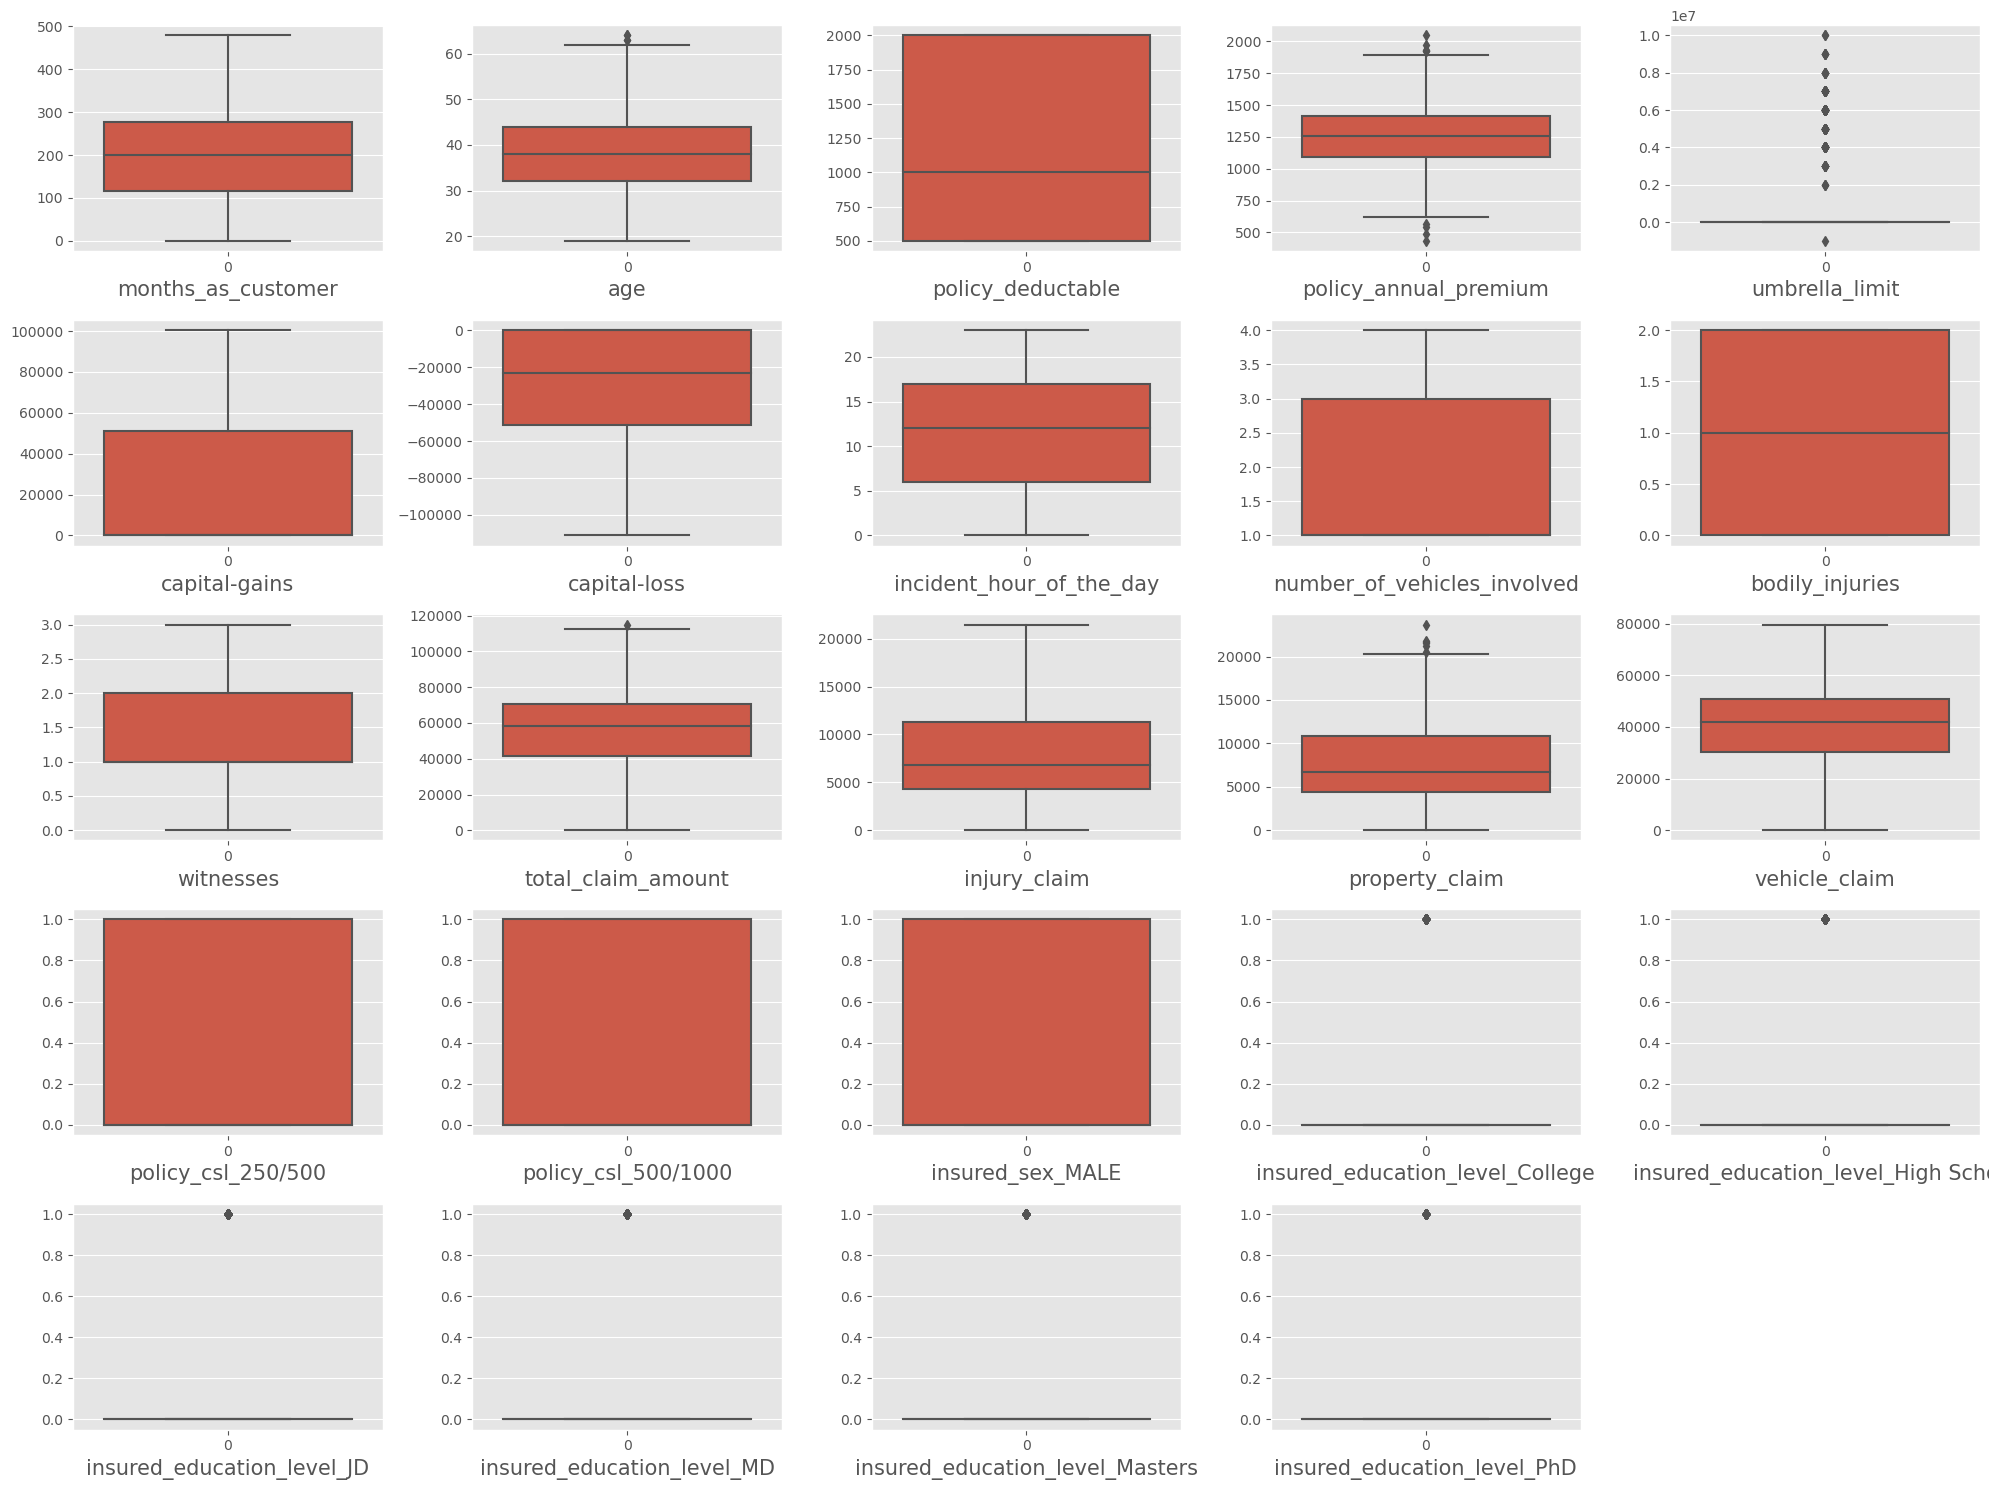

In [167]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(X[col])
        plt.xlabel(col, fontsize = 15)
    
    plotnumber += 1
plt.tight_layout()
plt.show()

In [168]:
#Standardizing the data:
numerical_data.columns

Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'capital-gains',
       'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim',
       'vehicle_claim'],
      dtype='object')

In [169]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

In [171]:
scaled_data

array([[ 1.07813958,  0.99083647, -0.22238259, ..., -0.18928317,
         1.16550497,  0.74965272],
       [ 0.2089946 ,  0.33407345,  1.41278352, ..., -1.36382194,
        -1.37269599, -1.82334593],
       [-0.60800168, -1.08891308,  1.41278352, ...,  0.05464372,
        -0.73607206, -0.78556451],
       ...,
       [-0.64276748, -0.54161057, -1.03996564, ...,  0.01364761,
         0.0208261 ,  0.77190224],
       [ 2.20802805,  2.52328351,  1.41278352, ..., -0.45370813,
        -0.45197603, -0.07357971],
       [ 2.19064515,  2.3043625 , -0.22238259, ..., -1.42941572,
        -1.34366428, -1.81434017]])

In [170]:
scaled_data_df=pd.DataFrame(scaled_data,columns=numerical_data.columns,index=X.index)

In [172]:
scaled_data_df

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim
0,1.078140,0.990836,-0.222383,0.616705,-0.479476,1.011331,0.953851,-0.956261,-0.823865,0.009759,0.461838,0.714257,-0.189283,1.165505,0.749653
1,0.208995,0.334073,1.412784,-0.242521,1.697980,-0.901927,0.953851,-0.524475,-0.823865,-1.210174,-1.338700,-1.807312,-1.363822,-1.372696,-1.823346
2,-0.608002,-1.088913,1.412784,0.642233,1.697980,0.358023,0.953851,-0.668404,1.140056,1.229693,1.362107,-0.686362,0.054644,-0.736072,-0.785565
3,0.452355,0.224613,1.412784,0.652886,2.133471,0.853388,-1.267577,-0.956261,-0.823865,0.009759,0.461838,0.403135,-0.224130,-0.219722,0.677607
4,0.208995,0.552994,-0.222383,1.341980,2.133471,1.467210,-0.683741,1.202666,-0.823865,-1.210174,-0.438431,-1.753121,-1.257232,-1.399654,-1.768252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.746582,-0.103769,-0.222383,0.222884,-0.479476,-0.901927,0.953851,1.202666,-0.823865,-1.210174,-0.438431,1.305049,2.051155,0.273817,1.224309
996,0.704407,0.224613,-0.222383,0.739141,-0.479476,1.643100,0.953851,1.634452,-0.823865,1.229693,1.362107,2.111466,2.182342,2.214794,1.821868
997,-0.642767,-0.541611,-1.039966,0.520739,0.826998,0.358023,0.953851,-1.100189,1.140056,1.229693,1.362107,0.558507,0.013648,0.020826,0.771902
998,2.208028,2.523284,1.412784,0.411866,1.697980,-0.901927,0.953851,-1.388046,-0.823865,-1.210174,-0.438431,-0.219110,-0.453708,-0.451976,-0.073580


In [174]:
X.drop(columns=scaled_data_df.columns,inplace=True)

In [175]:
X=pd.concat([scaled_data_df,X],axis=1)

In [176]:
X.head(10)

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,collision_type_data[col].mode()[0],incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,property_damage_data[col].mode()[0],police_report_available_YES,police_report_available_data[col].mode()[0],fraud_reported_Y
0,1.078140,0.990836,-0.222383,0.616705,-0.479476,1.011331,0.953851,-0.956261,-0.823865,0.009759,0.461838,0.714257,-0.189283,1.165505,0.749653,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,1
1,0.208995,0.334073,1.412784,-0.242521,1.697980,-0.901927,0.953851,-0.524475,-0.823865,-1.210174,-1.338700,-1.807312,-1.363822,-1.372696,-1.823346,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,1,0,1,1
2,-0.608002,-1.088913,1.412784,0.642233,1.697980,0.358023,0.953851,-0.668404,1.140056,1.229693,1.362107,-0.686362,0.054644,-0.736072,-0.785565,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,0.452355,0.224613,1.412784,0.652886,2.133471,0.853388,-1.267577,-0.956261,-0.823865,0.009759,0.461838,0.403135,-0.224130,-0.219722,0.677607,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
4,0.208995,0.552994,-0.222383,1.341980,2.133471,1.467210,-0.683741,1.202666,-0.823865,-1.210174,-0.438431,-1.753121,-1.257232,-1.399654,-1.768252,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0
5,0.452355,0.005692,-0.222383,0.388018,-0.479476,-0.901927,0.953851,1.058738,1.140056,-1.210174,0.461838,0.429662,-0.209781,-0.205206,0.707273,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
6,-0.581927,-0.541611,-0.222383,0.315285,-0.479476,-0.901927,-1.787335,-1.675903,1.140056,-1.210174,-1.338700,0.981042,2.873127,-0.051753,0.642113,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0
7,-0.338567,-0.213229,-0.222383,-0.489156,-0.479476,-0.901927,0.953851,1.634452,1.140056,1.229693,0.461838,-0.044411,0.399011,0.410680,-0.270117,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0
8,-1.537987,-0.651071,-1.039966,0.764546,-0.479476,-0.901927,0.953851,1.346595,-0.823865,0.009759,-0.438431,-0.949736,-0.955911,-0.960031,-0.835361,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
9,0.069931,0.334073,-1.039966,0.242881,-0.479476,-0.901927,-0.445222,0.339095,-0.823865,1.229693,-0.438431,-0.396461,-0.560298,-0.559808,-0.266409,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0


In [177]:
# splitting data into training set and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

### MODEL BUILDING

#### Model 1- KNN ALgorithm

##### Pseudocode for implementing the KNN algorithm from scratch:
        1	Load the training data.
        2	Prepare data by scaling, missing value treatment, and dimensionality reduction as required.(Provides different results for different scales of data, cannot compute distance if missing value is present, treats all features equally important and may need to reduce the features to those that are actually relevant)
        3	Find the optimal value for K:
        4	Predict a class value for new data:
        1	Calculate distance(X, Xi) from i=1,2,3,….,n.
        2	where X= new data point, Xi= training data, distance as per your chosen distance metric.
        3	Sort these distances in increasing order with corresponding train data.
        4	From this sorted list, select the top ‘K’ rows.
        5	Find the most frequent class from these chosen ‘K’ rows. This will be your predicted class.
    
    
##### Hyperparameters:
    
- n_neighbors:  default=5 [can compute the optimum values for k using error curve]
    Number of neighbors to use by default for kneighbors queries.

- weights{‘uniform’, ‘distance’}, callable or None, default=’uniform’
    Weight function used in prediction. Possible values:
        ‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.
        ‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.
        [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.

- algorithm{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’
    Algorithm used to compute the nearest neighbors:
        - ‘ball_tree’ will use BallTree-> divides the space repeatedly using balls of circle
        - ‘kd_tree’ will use KDTree-> divides the space repeatedly using hyperplanes
        - ‘brute’ will use a brute-force search.
        - ‘auto’ will attempt to decide the most appropriate algorithm based on the values passed to fit method.
        Note: fitting on sparse input will override the setting of this parameter, using brute force.

- leaf_size, default=30
    Leaf size passed to BallTree or KDTree. This can affect the speed of the construction and query, as well as the memory required to store the tree. The optimal value depends on the nature of the problem.

- p: default=2
    Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.

- metrics, default=’minkowski’
    Metric to use for distance computation. Default is “minkowski”, which results in the standard Euclidean distance when p = 2. See the documentation of scipy.spatial.distance and the metrics listed in distance_metrics for valid metric values.


- metric_params, default=None
    Additional keyword arguments for the metric function.

- n_jobs, default=None
    The number of parallel jobs to run for neighbors search. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details. Doesn’t affect fit method.


In [181]:
!pip install -U scikit-learn

^C
ERROR: Operation cancelled by user


In [201]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

knn =KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

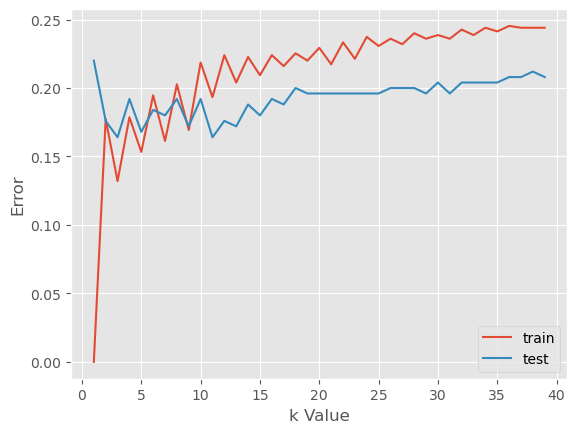

In [200]:
#Finding the best value for k  using error Curve
# Idea-Suffers from high testing error due to high variance and later on high training error due to high bias.

error1= []
error2= []
for k in range(1,40):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred1= knn.predict(X_train)
    error1.append(np.mean(y_train!= y_pred1))
    y_pred2= knn.predict(X_test)
    error2.append(np.mean(y_test!= y_pred2))
# plt.figure(figsize(10,5))
plt.plot(range(1,40),error1,label="train")
plt.plot(range(1,40),error2,label="test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()

In [202]:
knn_train_acc=accuracy_score(y_train,knn.predict(X_train))
print(knn_train_acc)
knn_test_acc=accuracy_score(y_test,y_pred)
print(knn_test_acc)

0.8306666666666667
0.828


In [203]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[194   2]
 [ 41  13]]
              precision    recall  f1-score   support

           N       0.83      0.99      0.90       196
           Y       0.87      0.24      0.38        54

    accuracy                           0.83       250
   macro avg       0.85      0.62      0.64       250
weighted avg       0.83      0.83      0.79       250



In [ ]:
### Future Scope

- Since KNN suffers from curse of dimensionality and treats all features as equal, we can choose relevant features and rerun
